In [0]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train = 'https://drive.google.com/open?id=12OWw4f4Vly18vmLG_-BEMPJ78-9CeFPn'
downloaded = drive.CreateFile({'id':'12OWw4f4Vly18vmLG_-BEMPJ78-9CeFPn'}) 
downloaded.GetContentFile('Train_Data_edited.csv')
val = 'https://drive.google.com/open?id=1njwUE_ANf_MKKPsD9XWDWuG317bzzZf5'
downloaded = drive.CreateFile({'id':'1njwUE_ANf_MKKPsD9XWDWuG317bzzZf5'}) 
downloaded.GetContentFile('Validation_Data_edited.csv')
test = 'https://drive.google.com/open?id=1Mhh9SVE1ph_tltip_NMjMNPy78p1O5O2'
downloaded = drive.CreateFile({'id':'1Mhh9SVE1ph_tltip_NMjMNPy78p1O5O2'}) 
downloaded.GetContentFile('Test_Data_edited.csv')

In [0]:
df_train = pd.read_csv('Train_Data_edited.csv')
df_val = pd.read_csv('Validation_Data_edited.csv')
df_test = pd.read_csv('Test_Data_edited.csv')

In [120]:
df_train.shape
df_train.head

<bound method NDFrame.head of        emotion  pixels  Unnamed: 2  ...  Unnamed: 2302  Unnamed: 2303  Unnamed: 2304
0            0      70          80  ...            106            109             82
1            0     151         150  ...            193            183            184
2            2     231         212  ...             88            110            152
3            4      24          32  ...            142            143            142
4            6       4           0  ...             30             29             30
...        ...     ...         ...  ...            ...            ...            ...
28704        2      84          85  ...            231            215            200
28705        0     114         112  ...            129            182            222
28706        4      74          81  ...            188            187            187
28707        0     222         227  ...            136            136            134
28708        4     195         199 

### a - Visualization

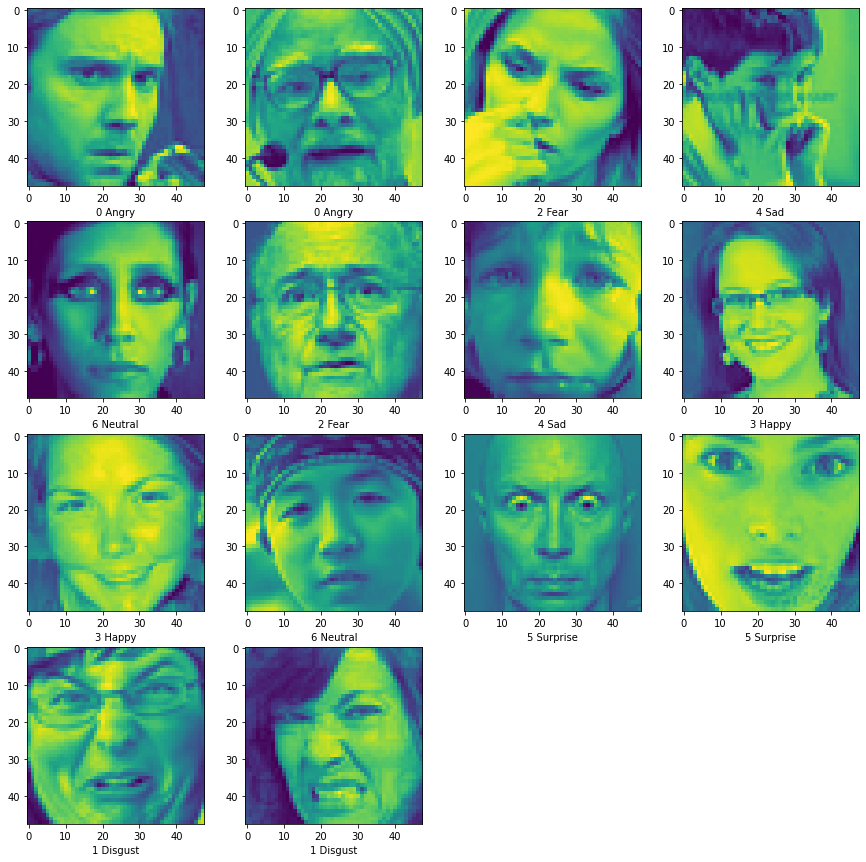

In [121]:
df_train_data = df_train.drop(columns=['emotion'])
#s = np.asfarray(df_train_data)
#print(s)
cl_list = [0,0,1,1,2,2,3,3,4,4,5,5,6,6]
cl_dict = {0:"Angry", 1: "Disgust", 2: "Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

fig, axs = plt.subplots(3, 3, figsize=(15,15))
j = 0
for i,val in enumerate(df_train[df_train.columns[0]]):

  if (len(cl_list)) and (val in cl_list):
    cl_list.remove(val)
    plt.subplot(4,4,j+1)
    plt.xlabel(str(val) + " " + cl_dict[val])
    img_arr_flat = np.asfarray(df_train_data.iloc[i])
    img = np.reshape(img_arr_flat, (48,48))
    plt.imshow(img)
    j = j + 1
  elif (len(cl_list)):
    continue
  else:
    break


### b - Data exploration

In [122]:
counts = df_train[df_train.columns[0]].value_counts()
lst = []
for i in counts.keys():
  #print(i)
  lst.append((i,cl_dict[i],counts[i]))
lst

[(3, 'Happy', 7215),
 (6, 'Neutral', 4965),
 (4, 'Sad', 4830),
 (2, 'Fear', 4097),
 (0, 'Angry', 3995),
 (5, 'Surprise', 3171),
 (1, 'Disgust', 436)]

### Image classification with FNNs
### c.i

In [123]:
# pandas to numpy

train_images = np.asfarray(df_train_data)
train_images = np.reshape(train_images, (len(train_images),48,48))
train_labels = np.asfarray(df_train[df_train.columns[0]])
print(train_images.shape)
df_val_data = df_val.drop(columns=['emotion'])
val_images = np.asfarray(df_val_data)
val_images = np.reshape(val_images, (len(val_images),48,48))
val_labels = np.asfarray(df_val[df_val.columns[0]])
print(val_images.shape)
df_test_data = df_test.drop(columns=['emotion'])
test_images = np.asfarray(df_test_data)
test_images = np.reshape(test_images, (len(test_images),48,48))
test_labels = np.asfarray(df_test[df_test.columns[0]])
print(test_images.shape)
# Preprocessing: Normalize the images.
train_images = (train_images / 255) - 0.5
val_images = (val_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

(28709, 48, 48)
(3589, 48, 48)
(3589, 48, 48)


In [124]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs



#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model_1 = Sequential([
  Dense(1000, activation='relu', input_shape=(48*48,), name="first_hidden_layer"), Dropout(0.5),
  Dense(100, activation='relu', name="second_hidden_layer"), Dropout(0.5),
  Dense(100, activation='relu', name="third_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model_1.summary())

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 1000)              2305000   
_________________________________________________________________
dropout_100 (Dropout)        (None, 1000)              0         
_________________________________________________________________
second_hidden_layer (Dense)  (None, 100)               100100    
_________________________________________________________________
dropout_101 (Dropout)        (None, 100)               0         
_________________________________________________________________
third_hidden_layer (Dense)   (None, 100)               10100     
_________________________________________________________________
dropout_102 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 7)               

In [0]:

# Compile model
model_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_images = train_images.reshape((-1, 48*48))
flatten_test_images = test_images.reshape((-1, 48*48))
flatten_val_images = val_images.reshape((-1, 48*48))

# Train model

%time model_1.fit(flatten_train_images, to_categorical(train_labels), epochs=750, batch_size= 500,)

In [0]:
plt.plot(model_1.history.history['loss'])
plt.title('Loss wrt iterations - Model 1')
plt.figure()
plt.plot(model_1.history.history['acc'])
plt.title('Accuracy wrt iterations - Model 1')

In [0]:
# Evaluate your model's performance on the test data
#performance_test = model.evaluate(flatten_test_images, to_categorical(test_labels))
performance_val_1 = model_1.evaluate(flatten_val_images,to_categorical(val_labels))
print("Accuracy on Val samples: {0}".format(performance_val_1[1]))
#print("Accuracy on Test samples: {0}".format(performance_test[1]))

In [0]:

#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model_2 = Sequential([
  Dense(250, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(100, activation='relu', name="second_hidden_layer"),Dropout(0.25),
  Dense(100, activation='relu', name="third_hidden_layer"),
  Dense(100, activation='relu', name="fourth_hidden_layer"),Dropout(0.25),
  Dense(50, activation='relu', name="fifth_hidden_layer"),
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model_2.summary())

# Compile model
model_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_images = train_images.reshape((-1, 48*48))
flatten_test_images = test_images.reshape((-1, 48*48))
flatten_val_images = val_images.reshape((-1, 48*48))

# Train model

%time model_2.fit(flatten_train_images, to_categorical(train_labels), epochs=748, batch_size= 1000,)
performance_val_2 = model_2.evaluate(flatten_val_images,to_categorical(val_labels))
print("Accuracy on Val samples: {0}".format(performance_val_2[1]))

In [0]:
plt.plot(model_2.history.history['loss'])
plt.title('Loss wrt iterations - Model 2')
plt.figure()
plt.plot(model_2.history.history['acc'])
plt.title('Accuracy wrt iterations - Model 2')

In [0]:

#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model_3 = Sequential([
  Dense(1000, activation='relu', input_shape=(48*48,), name="first_hidden_layer"), Dropout(0.5),
  Dense(1000, activation='relu', name="second_hidden_layer"), 
  Dense(1000, activation='relu', name="third_hidden_layer"), Dropout(0.25),
  Dense(1000, activation='relu', name="fourth_hidden_layer"), 
  Dense(1000, activation='relu', name="fifth_hidden_layer"), Dropout(0.25),
  Dense(1000, activation='relu', name="sixth_hidden_layer"), 
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model_3.summary())

# Compile model
model_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_images = train_images.reshape((-1, 48*48))
flatten_test_images = test_images.reshape((-1, 48*48))
flatten_val_images = val_images.reshape((-1, 48*48))

# Train model

%time model_3.fit(flatten_train_images, to_categorical(train_labels), epochs=450, batch_size= 1000,)
performance_val_3 = model_3.evaluate(flatten_val_images,to_categorical(val_labels))
print("Accuracy on Val samples: {0}".format(performance_val_3[1]))

In [0]:
plt.plot(model_3.history.history['loss'])
plt.title('Loss wrt iterations - Model 3')
plt.figure()
plt.plot(model_3.history.history['acc'])
plt.title('Accuracy wrt iterations - Model 3')

### Image classification with FNNs
### c.ii

In [0]:
performance_test_1 = model_1.evaluate(flatten_test_images,to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance_test_1[1]))

### Image classification with CNNs
### d.i

In [0]:
# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(7, activation='softmax'),]

cnn_model_1 = Sequential(common_features+classifier)

print(cnn_model_1.summary())  # Compare number of parameteres against FFN
cnn_model_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(28709,48,48,1)
test_images_3d = test_images.reshape(3589,48,48,1)
val_images_3d = val_images.reshape(3589,48,48,1)

%time cnn_model_1.fit(train_images_3d, to_categorical(train_labels), epochs=300, batch_size=256,)
performance_1 = cnn_model_1.evaluate(val_images_3d, to_categorical(val_labels))

print("Accuracy on validation samples: {0}".format(performance_1[1]))

In [0]:
plt.plot(cnn_model_1.history.history['loss'])
plt.title('Loss wrt iterations - CNN_Model 1')
plt.figure()
plt.plot(cnn_model_1.history.history['acc'])
plt.title('Accuracy wrt iterations - CNN_Model 1')

In [0]:
# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(30, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(50, kernel_size=3, activation='relu'), Dropout(0.5),
            Conv2D(60, kernel_size=3, activation='relu'), Dropout(0.25),
            Conv2D(10, kernel_size=4, activation= 'relu'), Dropout(0.25),
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(500, activation='relu'), Dense(7, activation='softmax'),]

cnn_model_2 = Sequential(common_features+classifier)

print(cnn_model_2.summary())  # Compare number of parameteres against FFN
cnn_model_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(28709,48,48,1)
test_images_3d = test_images.reshape(3589,48,48,1)
val_images_3d = val_images.reshape(3589,48,48,1)

%time cnn_model_2.fit(train_images_3d, to_categorical(train_labels), epochs=300, batch_size=1000,)
performance_2 = cnn_model_2.evaluate(val_images_3d, to_categorical(val_labels))

print("Accuracy on validation samples: {0}".format(performance_2[1]))

In [0]:
plt.plot(cnn_model_2.history.history['loss'])
plt.title('Loss wrt iterations - CNN_Model 2')
plt.figure()
plt.plot(cnn_model_2.history.history['acc'])
plt.title('Accuracy wrt iterations - CNN_Model 2')

In [0]:

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(32, kernel_size=3, activation='relu'),
            Conv2D(20, kernel_size=3, activation='relu'),
            Conv2D(10, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(100, activation='relu'), Dense(7, activation='softmax'),]

cnn_model_3 = Sequential(common_features+classifier)

print(cnn_model_3.summary())  # Compare number of parameteres against FFN
cnn_model_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(28709,48,48,1)
test_images_3d = test_images.reshape(3589,48,48,1)
val_images_3d = val_images.reshape(3589,48,48,1)

%time cnn_model_3.fit(train_images_3d, to_categorical(train_labels), epochs=300, batch_size=200,)
performance_3 = cnn_model_3.evaluate(val_images_3d, to_categorical(val_labels))

print("Accuracy on Test samples: {0}".format(performance_3[1]))

In [0]:
plt.plot(cnn_model_3.history.history['loss'])
plt.title('Loss wrt iterations - CNN_Model 3')
plt.figure()
plt.plot(cnn_model_3.history.history['acc'])
plt.title('Accuracy wrt iterations - CNN_Model 3')

### Image classification with CNNs
### d.ii

In [0]:
performance_test = cnn_model_1.evaluate(test_images_3d, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance_test[1]))

### Fine Tuning

In [125]:
vgg16_model = VGG16(include_top = False, input_shape = (48,48,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [0]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

#Freeze layers
for layer in model.layers[:-2]:
  layer.trainable = False
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))
model.summary()

In [0]:
train_images_3d = train_images.reshape(28709,48,48,1)
test_images_3d = test_images.reshape(3589,48,48,1)
val_images_3d = val_images.reshape(3589,48,48,1)

new_train = np.zeros(shape = (train_images_3d.shape[0],train_images_3d.shape[1],train_images_3d.shape[2],3))
#print(new.shape)
new_test = np.zeros(shape = (test_images_3d.shape[0],test_images_3d.shape[1],test_images_3d.shape[2],3))
new_val = np.zeros(shape = (val_images_3d.shape[0],val_images_3d.shape[1],val_images_3d.shape[2],3))

for i in range(train_images_3d.shape[0]):
  img = train_images_3d[i,:,:,0]
  new_train[i,:,:,0] = img
  new_train[i,:,:,1] = img
  new_train[i,:,:,2] = img

for i in range(val_images_3d.shape[0]):
  img = val_images_3d[i,:,:,0]
  new_val[i,:,:,0] = img
  new_val[i,:,:,1] = img
  new_val[i,:,:,2] = img

for i in range(test_images_3d.shape[0]):
  img = test_images_3d[i,:,:,0]
  new_test[i,:,:,0] = img
  new_test[i,:,:,1] = img
  new_test[i,:,:,2] = img


In [0]:

model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
%time model.fit(new_train, to_categorical(train_labels), epochs=20, batch_size=200,)

performance_finetuning = model.evaluate(new_val, to_categorical(val_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning[1]))

performance_finetuning_test = model.evaluate(new_test, to_categorical(test_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning_test[1]))

In [0]:
model_2 = Sequential()
for layer in vgg16_model.layers:
  model_2.add(layer)

#Freeze layers
for layer in model_2.layers[:-1]:
  layer.trainable = False
model_2.add(Flatten())
model_2.add(Dense(20, activation = 'relu'))
model_2.add(Dense(7, activation = 'softmax'))
model_2.summary()

model_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
%time model_2.fit(new_train, to_categorical(train_labels), epochs=10, batch_size=500,)

performance_finetuning_model2 = model_2.evaluate(new_val, to_categorical(val_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning_model2[1]))

performance_finetuning_test_model2 = model_2.evaluate(new_test, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance_finetuning_test_model2[1]))

In [0]:
model_3 = Sequential()
for layer in vgg16_model.layers:
  model_3.add(layer)

#Freeze layers
for layer in model_3.layers:
  layer.trainable = False
model_3.add(Flatten())
model_3.add(Dense(20, activation = 'relu'))
model_3.add(Dense(10, activation = 'relu'))
model_3.add(Dense(7, activation = 'softmax'))
model_3.summary()

model_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
%time model_3.fit(new_train, to_categorical(train_labels), epochs=30, batch_size=250,)

performance_finetuning_model3 = model_3.evaluate(new_val, to_categorical(val_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning_model3[1]))

performance_finetuning_test_model3 = model_3.evaluate(new_test, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance_finetuning_test_model3[1]))

### Bayesian optimization for hyper-parameter tuning

In [0]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
import sys

In [93]:
train_images_3d = train_images.reshape(28709,48,48,1)
test_images_3d = test_images.reshape(3589,48,48,1)
val_images_3d = val_images.reshape(3589,48,48,1)

space = {
    'num_layers':hp.choice('num_layers', [2, 3, 4]),
    'num_filters':hp.choice('num_filters', [12, 24, 36]),
    #'num_convolutions':hp.choice('num_convolutions', [2, 3, 4]),
    'dropout':hp.choice('dropout',[0,0.2,0.4]),
    #'kernel_size':hp.choice('kernel_size', [1,2,3]),
    'num_neurons':hp.choice('num_neurons',[100,200,500]),
}

def train_CNN_model(params):
  model_opt = Sequential()
  model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu', input_shape=(48,48,1)))
  model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu'))
  model_opt.add(Dropout(params['dropout']))

  if params['num_layers'] >= 3:
    model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu'))
    model_opt.add(Dropout(params['dropout']))        
    model_opt.add(MaxPooling2D(pool_size=(2,2)))
    model_opt.add(Dropout(params['dropout']))

  
  if params['num_layers'] == 4:
    model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu'))
    model_opt.add(MaxPooling2D(pool_size=(2,2)))
    model_opt.add(Dropout(params['dropout']))
    
  model_opt.add(Flatten())
  model_opt.add(Dense(params['num_neurons'],activation = 'relu'))
  model_opt.add(Dense(7, activation = 'sigmoid'))
  model_opt.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
  #print(model_opt.summary())  # Compare number of parameteres against FFN

  model_opt.fit(train_images_3d, to_categorical(train_labels), epochs=50, batch_size=500,verbose = 0)
  performance_opt_val = model_opt.evaluate(val_images_3d, to_categorical(val_labels))
  performance_opt_test = model_opt.evaluate(test_images_3d,to_categorical(test_labels))
  print("Accuracy on Validation samples: {0}".format(performance_opt_val[1]))
  print("Accuracy on Test samples: {0}".format(performance_opt_test[1]))
  sys.stdout.flush()
  return {'loss' : -performance_opt_val[1], 'status': STATUS_OK}

trials = Trials()
best_hyperparams = fmin(train_CNN_model,space, algo = tpe.suggest, max_evals = 10, trials = trials)
print(best_hyperparams)

  32/3589 [..............................]
 - ETA: 1:08

 384/3589 [==>...........................]
 - ETA: 5s  

 704/3589 [====>.........................]
 - ETA: 2s

1024/3589 [=======>......................]
 - ETA: 1s

1376/3589 [==========>...................]
 - ETA: 1s

1664/3589 [============>.................]
 - ETA: 1s

1920/3589 [===============>..............]
 - ETA: 0s

2272/3589 [=================>............]
 - ETA: 0s

2592/3589 [====================>.........]
 - ETA: 0s

2880/3589 [====================

### Data Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#augmenting factors
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=120,
    width_shift_range=0.4,
    height_shift_range=0.1,
    horizontal_flip=True)
#Create new_data array
new_data = datagen.flow((train_images_3d, train_labels), batch_size=1)

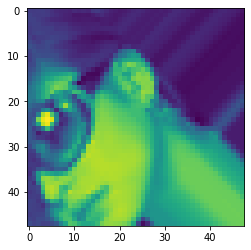

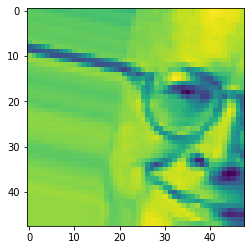

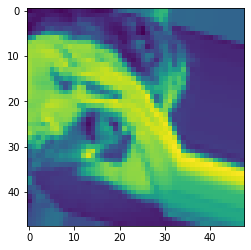

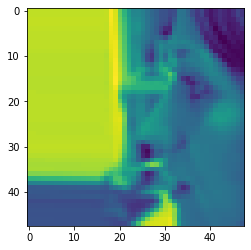

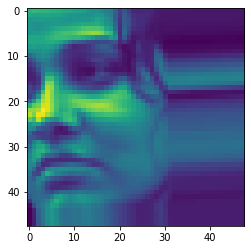

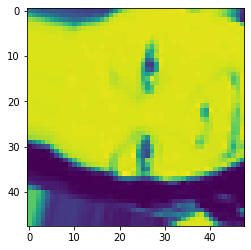

In [130]:
plt.figure()
plt.imshow(np.squeeze(new_data[1][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[5][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[15][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[8][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[6][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[9][0]))


### Feature Design

In [0]:
from skimage.feature import hog
from skimage import data, exposure

In [0]:
train_images_3d = train_images.reshape(28709,48,48,1)
test_images_3d = test_images.reshape(3589,48,48,1)
val_images_3d = val_images.reshape(3589,48,48,1)

new_hog_train = np.zeros(shape = (200, 48*48))
#print(new.shape)
new_hog_test = np.zeros(shape = (50, 48*48))
new_hog_val = np.zeros(shape = (50, 48*48))

for i in range(200):

  img = train_images_3d[i,:,:,0]
  hog_image = hog(img, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
  new_hog_train[i,:] = hog_image[1].reshape(1,48*48)

for i in range(50):
  img = val_images_3d[i,:,:,0]
  hog_image = hog(np.squeeze(img), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
  new_hog_val[i,:] = hog_image[1].reshape(1,48*48)


for i in range(50):
  img = test_images_3d[i,:,:,0]
  hog_image = hog(np.squeeze(img), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
  new_hog_test[i,:] = hog_image[1].reshape(1,48*48)

In [115]:
#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model_last = Sequential([
  Dense(250, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(100, activation='relu', name="second_hidden_layer"),Dropout(0.25),
  Dense(100, activation='relu', name="third_hidden_layer"),
  Dense(100, activation='relu', name="fourth_hidden_layer"),Dropout(0.25),
  Dense(50, activation='relu', name="fifth_hidden_layer"),
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model_last.summary())

# Compile model
model_last.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)


# Train model

%time model_last.fit(new_hog_train, to_categorical(train_labels[0:200]), epochs=45, batch_size= 1,)
performance_val_last = model_last.evaluate(new_hog_val,to_categorical(val_labels[0:50]))
print("Accuracy on Val samples: {0}".format(performance_val_last[1]))
performance_test_last = model_last.evaluate(new_hog_val,to_categorical(test_labels[0:50]))
print("Accuracy on test samples: {0}".format(performance_test_last[1]))

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 250)               576250    
_________________________________________________________________
second_hidden_layer (Dense)  (None, 100)               25100     
_________________________________________________________________
dropout_98 (Dropout)         (None, 100)               0         
_________________________________________________________________
third_hidden_layer (Dense)   (None, 100)               10100     
_________________________________________________________________
fourth_hidden_layer (Dense)  (None, 100)               10100     
_________________________________________________________________
dropout_99 (Dropout)         (None, 100)               0         
_________________________________________________________________
fifth_hidden_layer (Dense)   (None, 50)              

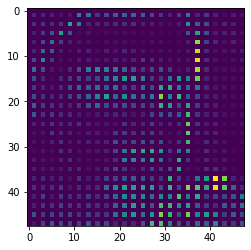

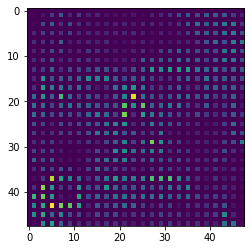

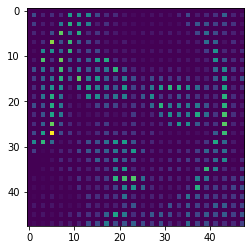

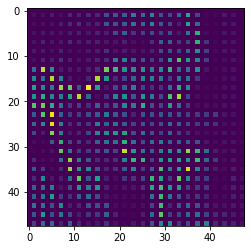

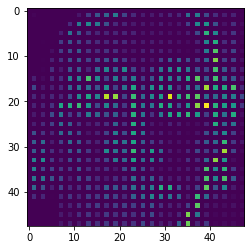

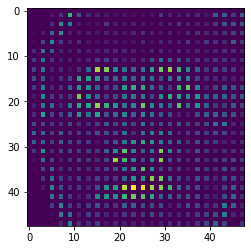

In [114]:
for i,j in enumerate(new_hog_train):
  plt.figure()
  plt.imshow(j.reshape(48,48))
  if i == 5:
    break